<a href="https://colab.research.google.com/github/rahafmtn/MASAR_bootcamp/blob/main/Data_Cleaning_%26_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the needed packages
import seaborn as sn
import pandas as pd

#read the data
df = pd.read_csv('/content/apple_quality (1) (1).csv')
diabetes_unc = df

In [ ]:
# let's explore the data

df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
# get the column
df.columns

Index(['ID', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
#rename columns
df.rename(columns={'A_id':'ID'}, inplace=True)

In [ ]:
#check the null (missing values)
df.isnull()

,ID,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False


In [ ]:
#check how many missing values
df.isnull().sum()

ID             1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
#replace the missing value(s) with mean

df['Size'] = df['Size'].fillna(df['Size'].mean())

In [ ]:
# dropping the missing values
df_new = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4000 non-null   float64
 1   Size         4001 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [ ]:
#check the  Quality  column values
df_new ['Quality'].unique()

array([' good ', ' bad '], dtype=object)

In [ ]:
#replace the white spaces
df_new.Quality = df_new.Quality.str.replace('good', ' good ')
df_new.Quality = df_new.Quality.str.replace('bad', ' bad ')

<ipython-input-22-4e0d52462428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Quality = df_new.Quality.str.replace('good', ' good ')
<ipython-input-22-4e0d52462428>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Quality = df_new.Quality.str.replace('bad', ' bad ')


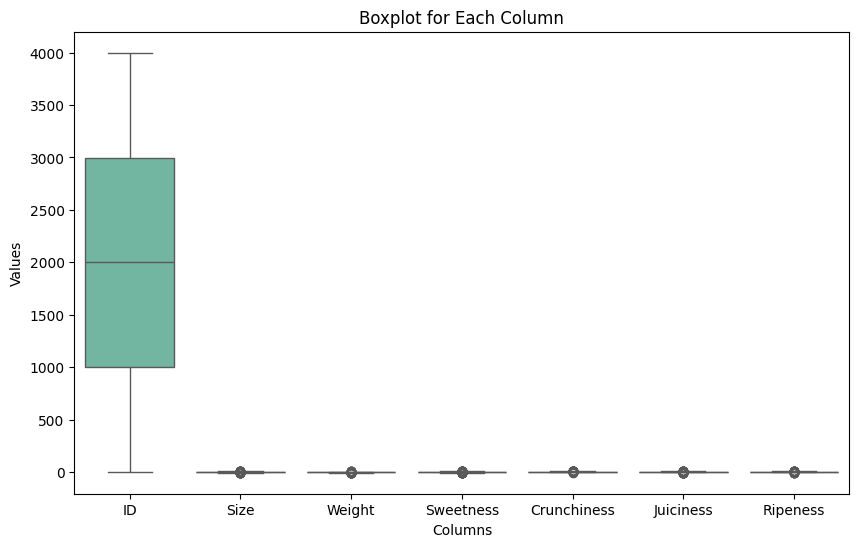

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each column using seaborn
sns.boxplot(data=df_new
            , orient='v', palette='Set2')

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')

# Show the plot
plt.show()

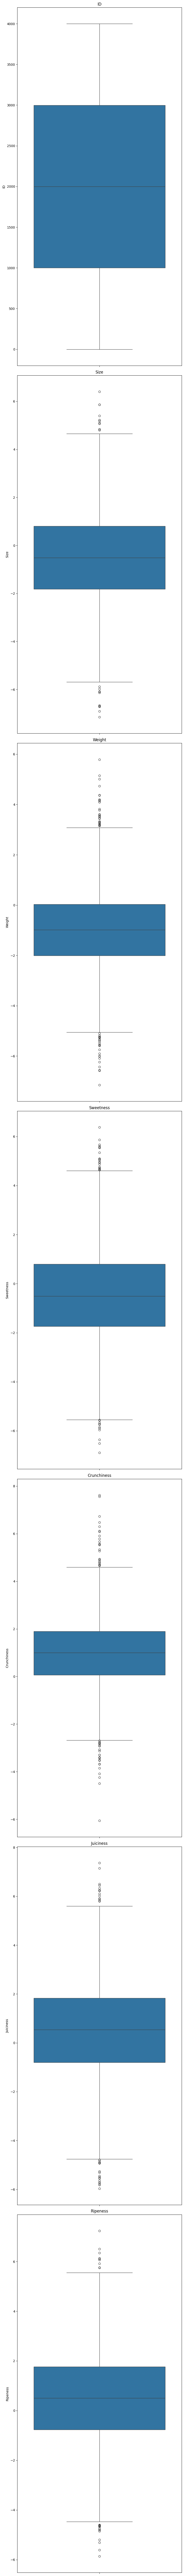

In [ ]:
# Select only numeric columns
numeric_columns = df_new.select_dtypes(include='number').columns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 111))

# Create individual boxplots for each numeric column using seaborn
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_new[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#max value
df_new['Sweetness'].max()

6.374915513

In [ ]:
df_new[df_new.Sweetness < 6400]

,ID,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
df_2 = df_new[df_new.Sweetness < 6000]

In [ ]:
df_2

,ID,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
# check for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3996    False
3997    False
3998    False
3999    False
4000    False
Length: 4001, dtype: bool

In [ ]:
#remove duplication

df_2 = df_2.drop_duplicates()

In [ ]:
#saving the new dataframe into a csv file

df.to_csv('rahaf_clean_dia.csv')